In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
import matplotlib.pyplot as plt

In [4]:
'''1. area A, 
2. perimeter P, 
3. compactness C = 4*pi*A/P^2, 
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove
From UC MachineLearning Repository Seeds'''
cols = [ "Area" , "Peri" , "Comapctness", "Length", "Width", "Assymmetry coeff", "Groove","Class"]
df = pd.read_csv("seeds_classify&cluster_101.txt", names = cols, sep = "\s+")
df.head()

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
C:\Users\kisha\AppData\Local\Temp\ipykernel_14736\3942870628.py:10: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("seeds_classify&cluster_101.txt", names = cols, sep = "\s+")


,Area,Peri,Comapctness,Length,Width,Assymmetry coeff,Groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
'''TO remove the SyntaxWarning regarding \s, by the end of the session try
import re

# Read the data from the .txt file
with open('data.txt', 'r') as file:
    data = file.read()

# Use a raw string for the regular expression to split the data based on whitespace
values = re.split(r'\s+', data)

# Print the separated values
print(values)
Acknowledgment: Blackbox.ai'''

In [6]:
#KMEANS
from sklearn.cluster import KMeans

C:\jupyter\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[]

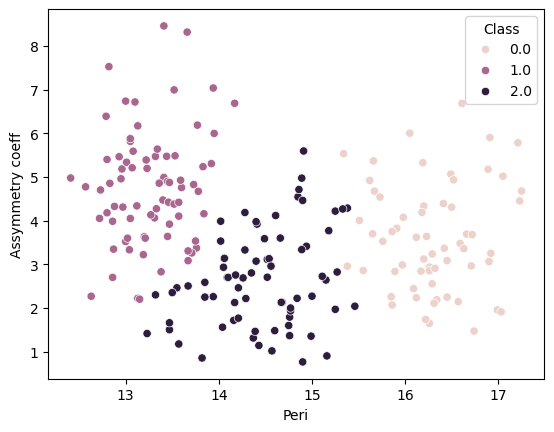

In [14]:
X = df[cols[:-1]].values
kmeans = KMeans(n_clusters = 3).fit(X)
clusters = kmeans.labels_
cdf = pd.DataFrame(np.hstack((X,clusters.reshape(-1,1))),columns = df.columns)
x='Peri'
y='Assymmetry coeff'
sns.scatterplot(x=x,y=y,hue="Class",data=cdf)
plt.plot()

In [15]:
#PCA
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components = 2)
tx = pca.fit_transform(X)

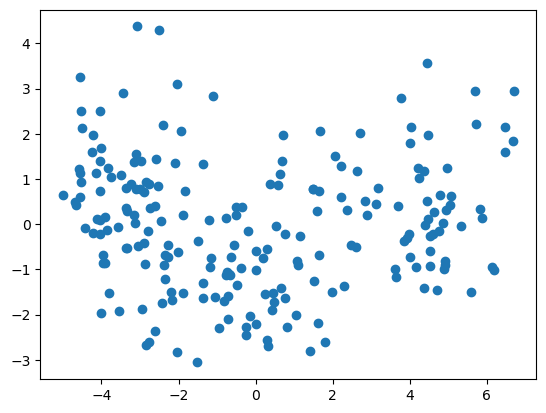

In [18]:
plt.scatter(tx[:,0],tx[:,1])
plt.show()

[]

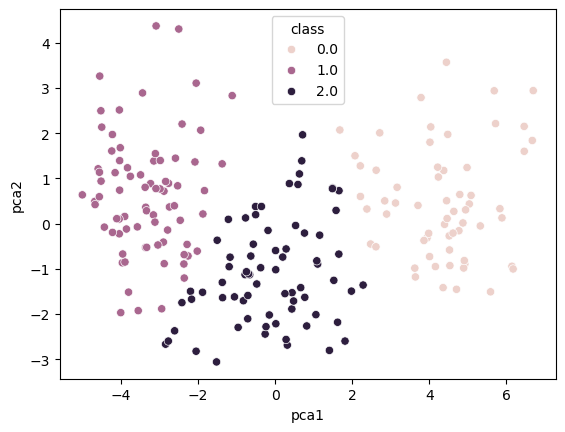

In [20]:
predtransdf = pd.DataFrame(np.hstack((tx,kmeans.labels_.reshape(-1,1))), columns = ["pca1","pca2","class"])
sns.scatterplot(x="pca1",y="pca2",hue="class",data=predtransdf)
plt.plot()